In [1]:
# Pandas
import pandas as pd 
import numpy as np 

In [2]:
# URL of the file is https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)

In [3]:
df.head()

0                  1       2           3   ...  11  12              13      14
0  39          State-gov   77516   Bachelors  ...   0  40   United-States   <=50K
1  50   Self-emp-not-inc   83311   Bachelors  ...   0  13   United-States   <=50K
2  38            Private  215646     HS-grad  ...   0  40   United-States   <=50K
3  53            Private  234721        11th  ...   0  40   United-States   <=50K
4  28            Private  338409   Bachelors  ...   0  40            Cuba   <=50K

[5 rows x 15 columns]

In [4]:
col_name= ["age",
            "workclass",
            "fnlwgt",
            "education",
            "educationNum",
            "maritalStatus",
            "occupation",
            "relationship",
            "race",
            "sex",
            "capitalGain",
            "capitalLoss",
            "hoursPerWeek",
            "nativeCountry",
            "above50K"]
df.columns = col_name

In [5]:
df.head()

age          workclass  fnlwgt  ... hoursPerWeek   nativeCountry above50K
0   39          State-gov   77516  ...           40   United-States    <=50K
1   50   Self-emp-not-inc   83311  ...           13   United-States    <=50K
2   38            Private  215646  ...           40   United-States    <=50K
3   53            Private  234721  ...           40   United-States    <=50K
4   28            Private  338409  ...           40            Cuba    <=50K

[5 rows x 15 columns]

In [6]:
# 25% of Age 
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [8]:
# 80% percentile 
df.age.describe(percentiles=[.25, .50, .75, .80, .90])

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
80%         50.000000
90%         58.000000
max         90.000000
Name: age, dtype: float64

In [11]:
# numpy 
np.percentile(df.age, 90)

58.0

In [13]:
# Female avg age 
df.loc[df.sex == " Female", 'age'].mean()

36.85823043357163

In [15]:
df.sample(5)

age   workclass  fnlwgt  ... hoursPerWeek   nativeCountry above50K
21143   53     Private  196763  ...           60   United-States    <=50K
10520   26   Local-gov  386949  ...           25   United-States    <=50K
27388   20     Private  471452  ...           30   United-States    <=50K
19634   30     Private  229895  ...           40   United-States    <=50K
8448    49     Private  196571  ...           45   United-States     >50K

[5 rows x 15 columns]

In [16]:
# Group By 

In [20]:
df.groupby("education").agg({"hoursPerWeek": "mean"})
# you can group on categorical variable 
# and the agg column is generally cont in nature

hoursPerWeek
education                  
 10th             37.052519
 11th             33.925957
 12th             35.780600
 1st-4th          38.255952
 5th-6th          38.897898
 7th-8th          39.366873
 9th              38.044747
 Assoc-acdm       40.504217
 Assoc-voc        41.610709
 Bachelors        42.614006
 Doctorate        46.973366
 HS-grad          40.575374
 Masters          43.836332
 Preschool        36.647059
 Prof-school      47.425347
 Some-college     38.852284

In [22]:
df.groupby(['education', 'sex']).agg({"age": "mean", "age": "max"})     #.agg({"column": "function"})

age
education     sex               
 10th          Female  35.447458
               Male    38.346395
 11th          Female  30.546296
               Male    33.407806
 12th          Female  29.756944
               Male    33.117647
 1st-4th       Female  48.521739
               Male    45.245902
 5th-6th       Female  44.369048
               Male    42.385542
 7th-8th       Female  49.693750
               Male    48.034979
 9th           Female  42.131944
               Male    40.643243
 Assoc-acdm    Female  36.361045
               Male    38.046440
 Assoc-voc     Female  37.872000
               Male    38.939909
 Bachelors     Female  35.635578
               Male    40.321734
 Doctorate     Female  45.325581
               Male    48.327217
 HS-grad       Female  38.678171
               Male    39.115736
 Masters       Female  43.074627
               Male    44.490312
 Preschool     Female  41.750000
               Male    43.228571
 Prof-school   Female  40.195652
               Male    45.611570
 Some-college  Female  33.740556
               Male    37.017391

In [29]:
df.groupby("education").agg(count=("age", "count"),
                            mean_age=("age", "mean"),
                            max_age=("age", 'max'),
                            mean_captial_gain=("capitalGain", "mean"),
                            max_capital_gain=("capitalGain", 'max')) #new_column_name=("column", "function")
# agg function - mean, median, mode, sum, count, size, max, min
# Custom Function

count   mean_age  max_age  mean_captial_gain  max_capital_gain
education                                                                    
 10th            933  37.429796       90         404.574491             99999
 11th           1175  32.355745       90         215.097872             14344
 12th            433  32.000000       79         284.087760             18481
 1st-4th         168  46.142857       90         125.875000              7688
 5th-6th         333  42.885886       84         176.021021              7298
 7th-8th         646  48.445820       90         233.939628             10566
 9th             514  41.060311       90         342.089494             99999
 Assoc-acdm     1067  37.381443       90         640.399250             99999
 Assoc-voc      1382  38.553546       84         715.051375             99999
 Bachelors      5355  38.904949       90        1756.299533             99999
 Doctorate       413  47.702179       80        4770.145278             99999
 HS-grad       10501  38.974479       90         576.800114             99999
 Masters        1723  44.049913       90        2562.563552             99999
 Preschool        51  42.764706       75         898.392157             41310
 Prof-school     576  44.746528       90       10414.416667             99999
 Some-college   7291  35.756275       90         598.824167             99999

In [32]:
df.sample(5)

age   workclass  fnlwgt  ... hoursPerWeek   nativeCountry above50K
31604   52     Private  146767  ...           40   United-States     >50K
19328   48     Private   34845  ...           40   United-States    <=50K
7495    30   State-gov  126414  ...           40   United-States    <=50K
12149   22     Private  459463  ...           50   United-States    <=50K
29462   42   Local-gov  195897  ...           40   United-States    <=50K

[5 rows x 15 columns]

In [31]:
nc_group = df.groupby(["nativeCountry"])

In [41]:
def custom_fnlwgt(num):
  # new_num = []
  # for i in num:
  #   if i > 50000:
  #     new_num.append(0)
  #   else:
  #     new_num.append(i)
  #   return sum(new_num)
  return max(num)

In [51]:
nc_group.agg(count=("fnlwgt", "count"),
             custom_fnlwgt=("fnlwgt", custom_fnlwgt), 
             max_fnlwgt=("fnlwgt", "max")) \
        .reset_index() \
        .sort_values(by="count")

nativeCountry  count  custom_fnlwgt  max_fnlwgt
15           Holand-Netherlands      1          27882       27882
34                     Scotland     12         387468      387468
18                      Hungary     13         358975      358975
16                     Honduras     13         411587      411587
28   Outlying-US(Guam-USVI-etc)     14         412435      412435
41                   Yugoslavia     16         557349      557349
37                     Thailand     18         361341      361341
25                         Laos     18         350979      350979
38              Trinadad&Tobago     19         659273      659273
1                      Cambodia     19         355856      355856
17                         Hong     20         356015      356015
21                      Ireland     24         196342      196342
7                       Ecuador     28         313945      313945
10                       France     29         493689      493689
12                       Greece     29         288229      288229
29                         Peru     31         551962      551962
27                    Nicaragua     34         849857      849857
32                     Portugal     37         371827      371827
20                         Iran     43         454508      454508
14                        Haiti     44         348092      348092
36                       Taiwan     51         506329      506329
4                      Columbia     59        1161363     1161363
31                       Poland     60         410351      410351
24                        Japan     62         586657      586657
13                    Guatemala     64         596776      596776
40                      Vietnam     67         379046      379046
6            Dominican-Republic     70         331875      331875
22                        Italy     73         573583      573583
3                         China     75         399246      399246
35                        South     80         375422      375422
23                      Jamaica     81         401623      401623
9                       England     90         447579      447579
5                          Cuba     95         505119      505119
19                        India    100         366957      366957
8                   El-Salvador    106         795830      795830
33                  Puerto-Rico    114         538319      538319
2                        Canada    121         509350      509350
11                      Germany    137         606111      606111
30                  Philippines    198         554206      554206
0                             ?    583         647882      647882
26                       Mexico    643         758700      758700
39                United-States  29170        1484705     1484705

In [52]:
df2 = pd.DataFrame(np.random.randint(9, 30, (5, 3)), columns=["a", 'b', 'c'])

In [53]:
df3 = pd.DataFrame(np.random.randint(9, 30, (5, 3)), columns=["a", 'b', 'c'])

In [54]:
df2

a   b   c
0  29  12  14
1  23  19  23
2  20  22  22
3  16  21  20
4  26  21  13

In [55]:
df3

a   b   c
0  12   9  11
1  16  15  17
2  25  16  20
3  22  18  28
4  11  28  14

In [60]:
pd.concat([df2, df3], axis=0)

a   b   c
0  29  12  14
1  23  19  23
2  20  22  22
3  16  21  20
4  26  21  13
0  12   9  11
1  16  15  17
2  25  16  20
3  22  18  28
4  11  28  14

In [64]:
pd.concat([df2, df3], axis=1)

a   b   c   a   b   c
0  29  12  14  12   9  11
1  23  19  23  16  15  17
2  20  22  22  25  16  20
3  16  21  20  22  18  28
4  26  21  13  11  28  14

In [63]:
# Correct the order of indexing 
pd.concat([df2, df3], axis=0).reset_index(drop=True)

a   b   c
0  29  12  14
1  23  19  23
2  20  22  22
3  16  21  20
4  26  21  13
5  12   9  11
6  16  15  17
7  25  16  20
8  22  18  28
9  11  28  14

In [81]:
df4 = pd.DataFrame([["Milk",756], ["Egg", 231], ["Bread", 456], ["Rice", 99]], columns=["July_Product", "July_Sales"])
df4

July_Product  July_Sales
0         Milk         756
1          Egg         231
2        Bread         456
3         Rice          99

In [77]:
df5 = pd.DataFrame([["Bread", 546], 
                    ["Egg", 321], 
                    ["Milk", 891],
                    ['Sugar', 765]], columns=["Aug_Product", "Aug_Sales"])
df5

Aug_Product  Aug_Sales
0       Bread        546
1         Egg        321
2        Milk        891
3       Sugar        765

In [75]:
# Merge 
df4.merge(df5, left_on="July_Product", right_on="Aug_Product")

July_Product  July_Sales Aug_Product  Aug_Sales
0         Milk         756        Milk        891
1          Egg         231         Egg        321
2        Bread         456       Bread        546

In [79]:
#Inner 
pd.merge(left=df5, right=df4, left_on="Aug_Product", right_on="July_Product", how="inner")

Aug_Product  Aug_Sales July_Product  July_Sales
0       Bread        546        Bread         456
1         Egg        321          Egg         231
2        Milk        891         Milk         756

In [80]:
pd.merge(left=df5, right=df4, how="left", left_on="Aug_Product", right_on="July_Product")

Aug_Product  Aug_Sales July_Product  July_Sales
0       Bread        546        Bread       456.0
1         Egg        321          Egg       231.0
2        Milk        891         Milk       756.0
3       Sugar        765          NaN         NaN

In [82]:
pd.merge(left=df5, right=df4, how="right", left_on="Aug_Product", right_on="July_Product")

Aug_Product  Aug_Sales July_Product  July_Sales
0        Milk      891.0         Milk         756
1         Egg      321.0          Egg         231
2       Bread      546.0        Bread         456
3         NaN        NaN         Rice          99

In [84]:
pd.merge(left=df5, right=df4, how="outer", left_on="Aug_Product", right_on="July_Product")

Aug_Product  Aug_Sales July_Product  July_Sales
0       Bread      546.0        Bread       456.0
1         Egg      321.0          Egg       231.0
2        Milk      891.0         Milk       756.0
3       Sugar      765.0          NaN         NaN
4         NaN        NaN         Rice        99.0

In [91]:
# Cross Tab
#index - rows
# columns

pd.crosstab(index=df.education, columns=df.sex)

sex             Female   Male
education                    
 10th              295    638
 11th              432    743
 12th              144    289
 1st-4th            46    122
 5th-6th            84    249
 7th-8th           160    486
 9th               144    370
 Assoc-acdm        421    646
 Assoc-voc         500    882
 Bachelors        1619   3736
 Doctorate          86    327
 HS-grad          3390   7111
 Masters           536   1187
 Preschool          16     35
 Prof-school        92    484
 Some-college     2806   4485

In [ ]:
# I want avg age of genders across education

In [92]:
df.groupby(["education", "sex"]).agg({"age": "mean"})

age
education     sex               
 10th          Female  35.447458
               Male    38.346395
 11th          Female  30.546296
               Male    33.407806
 12th          Female  29.756944
               Male    33.117647
 1st-4th       Female  48.521739
               Male    45.245902
 5th-6th       Female  44.369048
               Male    42.385542
 7th-8th       Female  49.693750
               Male    48.034979
 9th           Female  42.131944
               Male    40.643243
 Assoc-acdm    Female  36.361045
               Male    38.046440
 Assoc-voc     Female  37.872000
               Male    38.939909
 Bachelors     Female  35.635578
               Male    40.321734
 Doctorate     Female  45.325581
               Male    48.327217
 HS-grad       Female  38.678171
               Male    39.115736
 Masters       Female  43.074627
               Male    44.490312
 Preschool     Female  41.750000
               Male    43.228571
 Prof-school   Female  40.195652
               Male    45.611570
 Some-college  Female  33.740556
               Male    37.017391

In [95]:
pd.crosstab(index=df.education, columns=df.sex, values=df.age, aggfunc="mean")

sex               Female       Male
education                          
 10th          35.447458  38.346395
 11th          30.546296  33.407806
 12th          29.756944  33.117647
 1st-4th       48.521739  45.245902
 5th-6th       44.369048  42.385542
 7th-8th       49.693750  48.034979
 9th           42.131944  40.643243
 Assoc-acdm    36.361045  38.046440
 Assoc-voc     37.872000  38.939909
 Bachelors     35.635578  40.321734
 Doctorate     45.325581  48.327217
 HS-grad       38.678171  39.115736
 Masters       43.074627  44.490312
 Preschool     41.750000  43.228571
 Prof-school   40.195652  45.611570
 Some-college  33.740556  37.017391

In [ ]:
# CSV (comma seperated file)
# Age, Sex, Education 
# 21, F, PhD 


# TSV (tab seperated file)
# Age   Sex   Education
# 21    F     PhD

In [ ]:
# WHY CSV IS A PROBLEM ?
# Product Name, Product Detail, Product Cost
# Product1, Product 1 is 10mmx15mm, this is non varient and disposes, $45.34



In [ ]:
pd.read_table

In [ ]:
# Matplotlib
#------------
# Seaborn 
# Plotly/Dash

In [97]:
import matplotlib.pyplot as plt # matplotlib
import seaborn as sns

In [96]:
alst = [10, 11, 15, 18, 9, 14, 13, 12, 15]

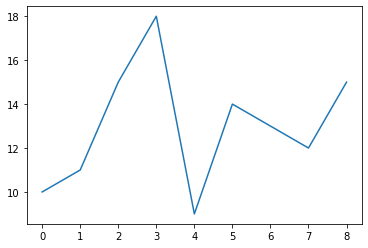

In [98]:
plt.plot(alst)

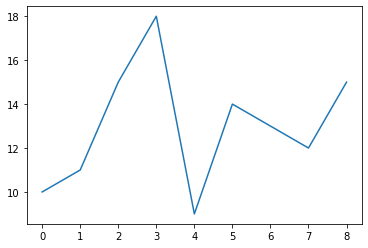

In [100]:
sns.lineplot(x=range(len(alst)), y=alst)

In [102]:
range(len(alst))

range(0, 9)

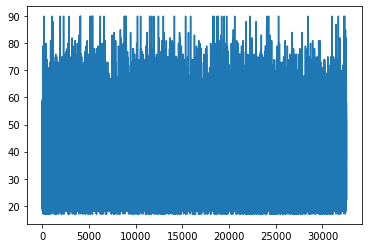

In [103]:
plt.plot(df.age)
# Line plot will make no sense for large numbers (also non Time series data)

In [106]:
blst = [21, 24, 26, 28, 18, 15, 17, 20, 25]

In [108]:
alst

[10, 11, 15, 18, 9, 14, 13, 12, 15]

In [109]:
blst

[21, 24, 26, 28, 18, 15, 17, 20, 25]

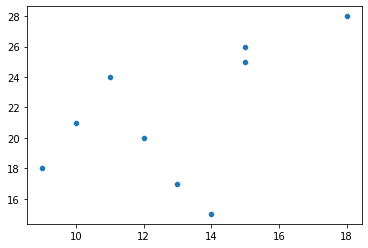

In [107]:
sns.scatterplot(x=alst, y=blst)

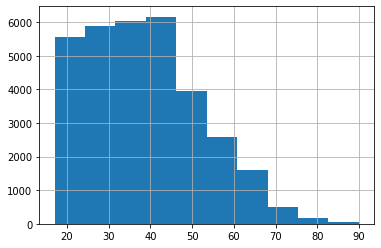

In [115]:
# Histogram 
df.age.hist(bins=10)

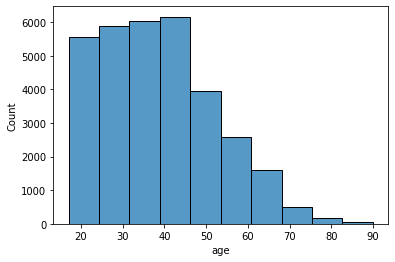

In [114]:
sns.histplot(df.age, bins=10)

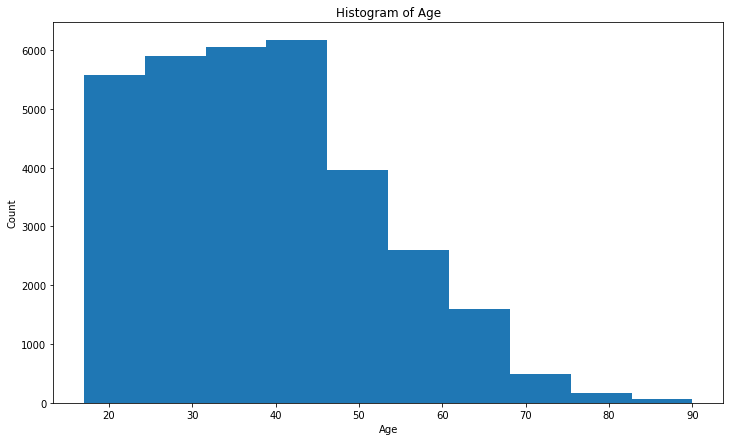

In [126]:
# Adjust the graph size ? 
plt.figure(figsize=(12, 7)) #width, height
# How to add lables in graphs
plt.hist(df.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")

# Save this graph 
plt.savefig("hist_age.png")

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

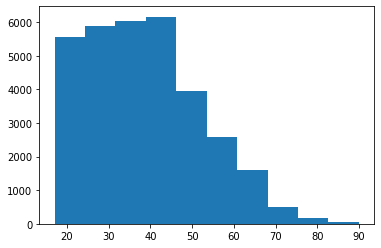

In [129]:
plt.hist(df.age, bins=10)

In [147]:
df.age.min()

17

In [145]:
(df.age.max() - df.age.min())/10

7.3

In [146]:
[17, 17+7.3, 17+(7.3*2)]

[17, 24.3, 31.6]

In [134]:
df.loc[(df.age >= 17) & (df.age <= 24.3)].shape[0]

5570

In [136]:
df.loc[(df.age >=82.7) & (df.age <= 90)].shape[0]

67

In [138]:
sns.histplot(df.age, kde=True, bins=10)

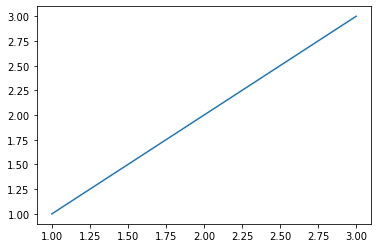

In [140]:
plt.plot([1, 2, 3], [1, 2, 3])

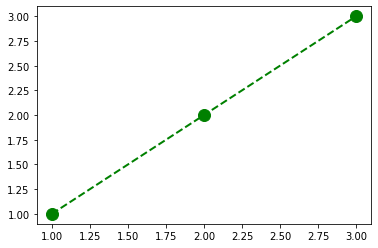

In [144]:
plt.plot([1, 2, 3], [1, 2, 3], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [148]:
# Categorical Variables - Bar Graph 
# df.education

df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

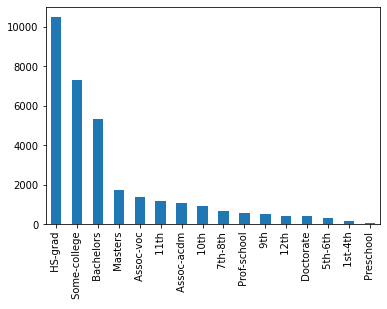

In [149]:
df.education.value_counts().plot.bar()

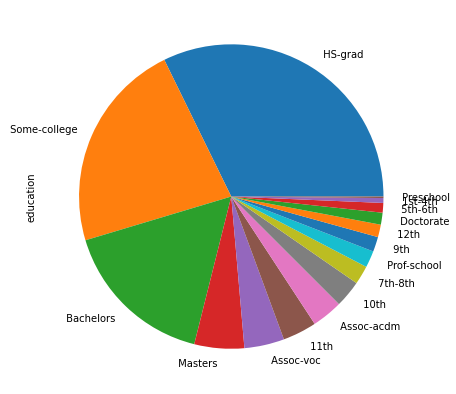

In [152]:
plt.figure(figsize=(7,7))
df.education.value_counts().plot.pie()

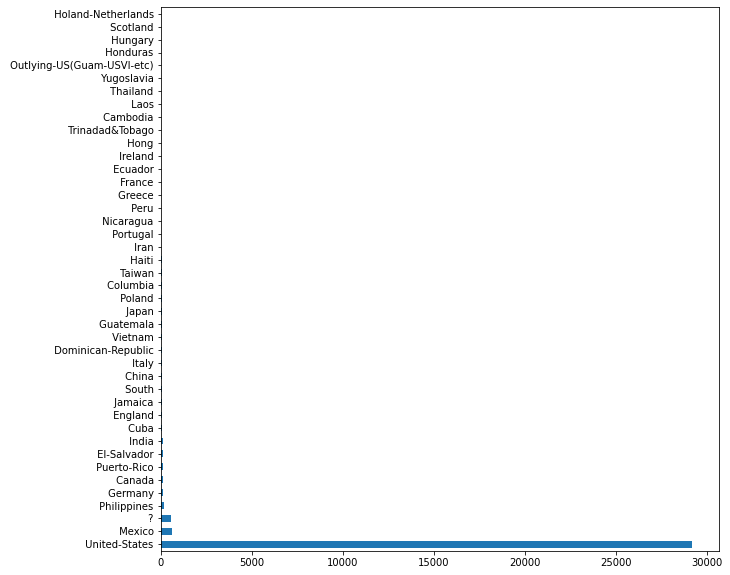

In [155]:
plt.figure(figsize=(10, 10))
df.nativeCountry.value_counts().plot.barh()

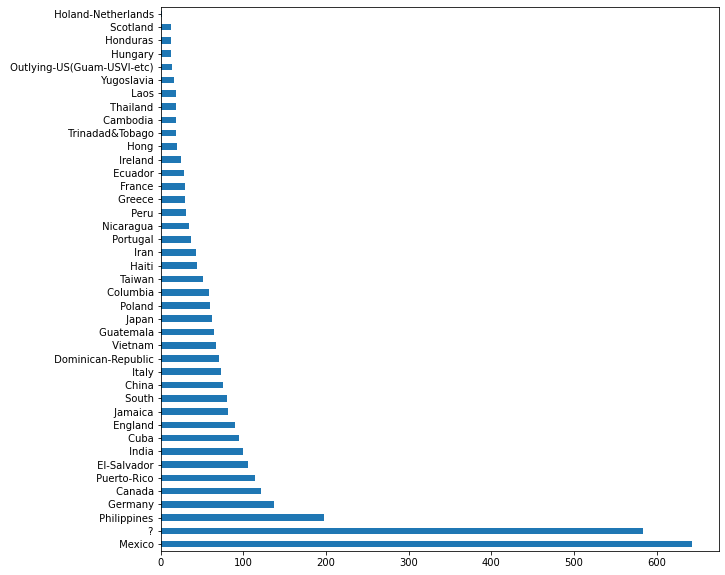

In [157]:
plt.figure(figsize=(10, 10))
df.loc[df.nativeCountry != " United-States", 'nativeCountry'].value_counts().plot.barh()

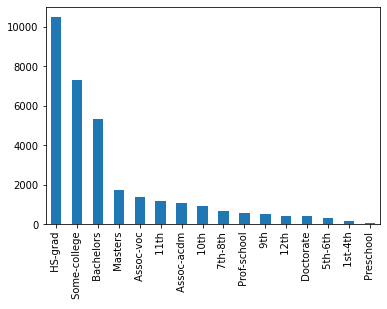

In [158]:
df.education.value_counts().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

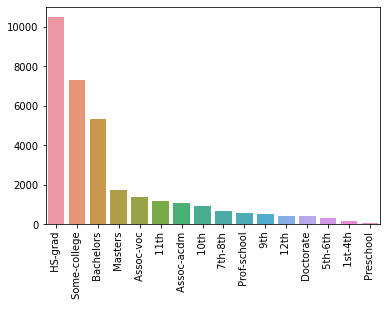

In [162]:
sns.barplot(x=df.education.value_counts().index, 
            y=df.education.value_counts().values)
plt.xticks(rotation=90)

In [163]:
df.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

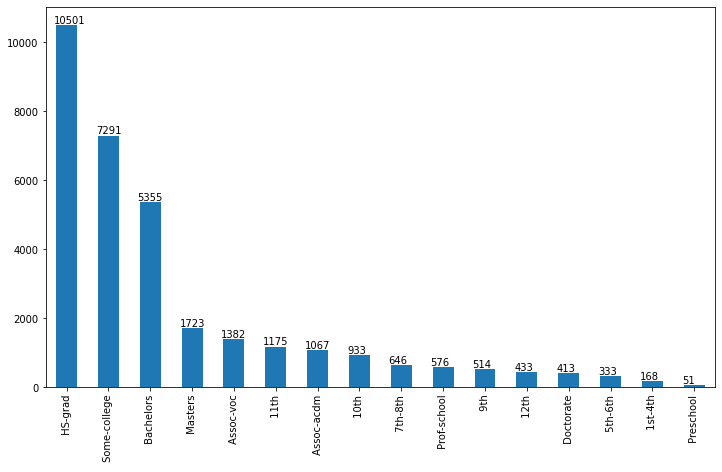

In [177]:
plt.figure(figsize=(12, 7))
df.education.value_counts().plot.bar()
for index, value in enumerate(df.education.value_counts()):
  plt.text(x=index -0.3, y=value+50, s=value)

In [178]:
# Cat Vs Cont

In [ ]:
# Gender Vs Age

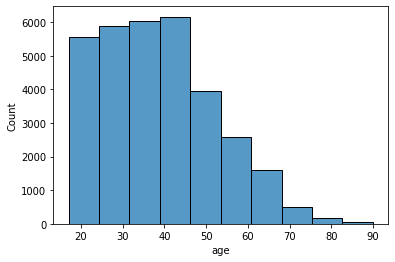

In [181]:
sns.histplot(df.age, bins=10)

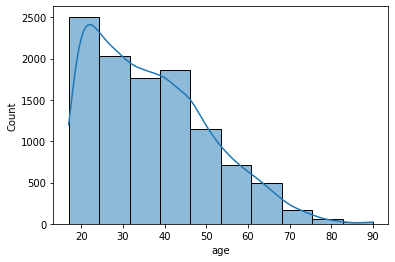

In [186]:
sns.histplot(df.loc[df.sex == " Female", 'age'], bins=10, kde=True)

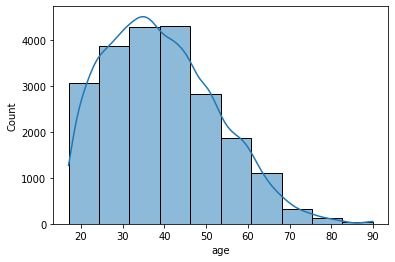

In [187]:
sns.histplot(df.loc[df.sex == " Male", 'age'], bins=10, kde=True)

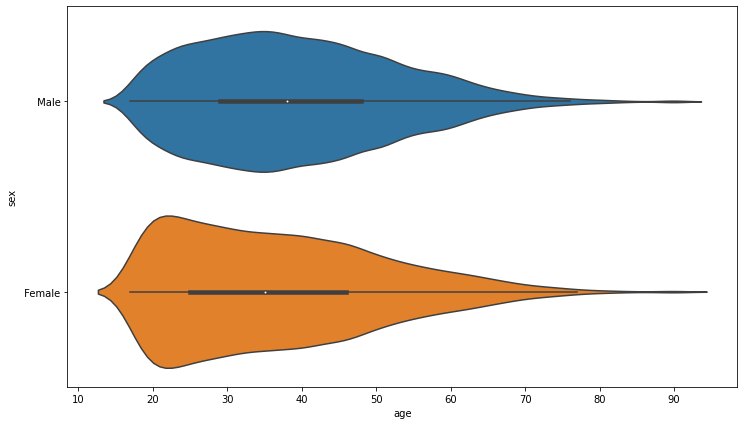

In [185]:
plt.figure(figsize=(12, 7))

sns.violinplot(x=df.age, y=df.sex)

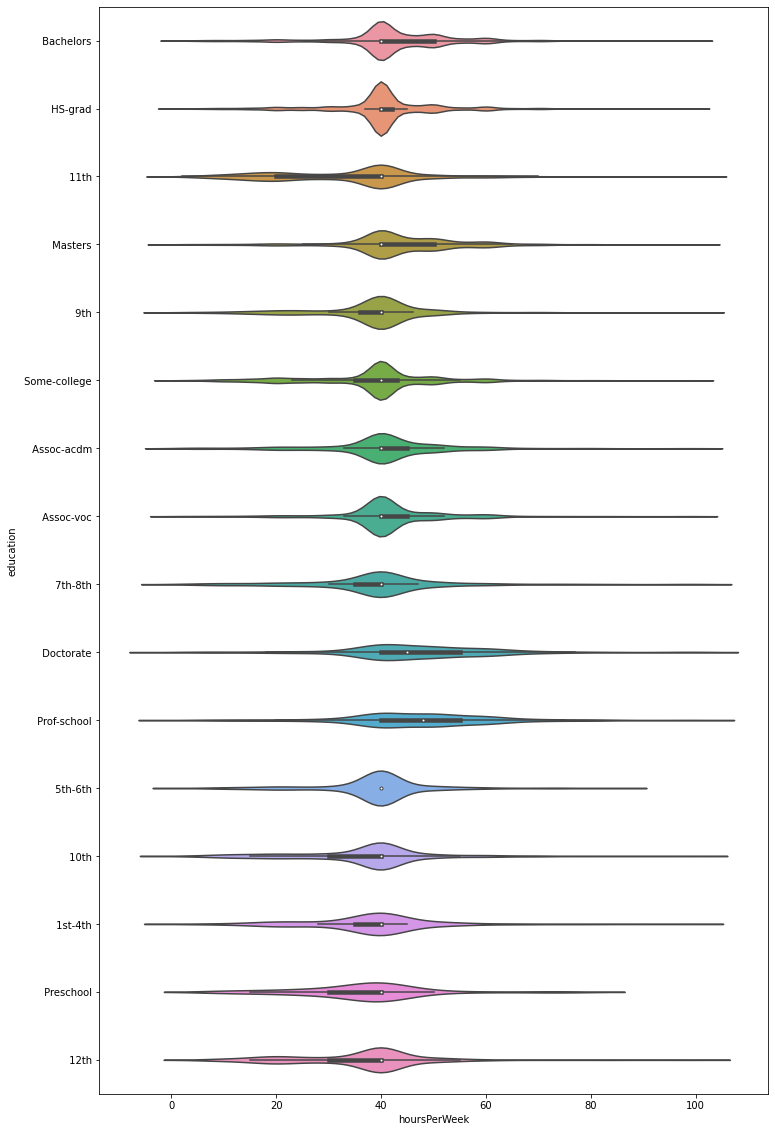

In [190]:
plt.figure(figsize=(12, 20))

sns.violinplot(x=df.hoursPerWeek, y=df.education)

In [191]:
# Heat Map

In [193]:
a = np.random.randint(10, 90, (7,7))
a

array([[74, 88, 44, 85, 49, 84, 72],
       [80, 46, 23, 61, 15, 67, 48],
       [49, 39, 61, 18, 24, 48, 45],
       [54, 69, 39, 78, 58, 18, 51],
       [24, 23, 31, 37, 66, 54, 84],
       [15, 41, 51, 29, 72, 16, 79],
       [33, 66, 24, 30, 89, 88, 60]])

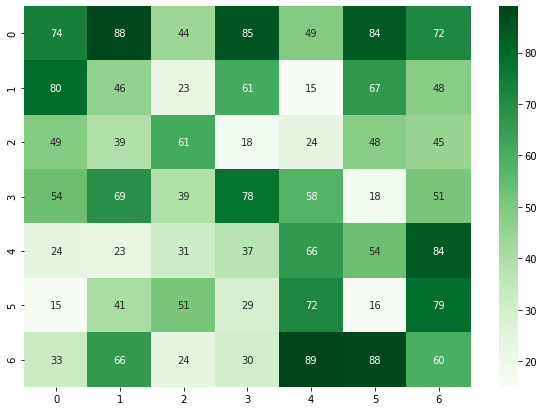

In [199]:
plt.figure(figsize=(10, 7))
sns.heatmap(a, cmap="Greens", annot=True)

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html